<a href="https://colab.research.google.com/github/MBSant/Python/blob/main/Aula02_Classifica%C3%A7%C3%A3o_Multiclasse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Modelo de Classificação Multiclasse
### Análise de dados com as variáveis resposta em 3 classes.
### Prof. Rafinha dos Dados - 
FLAI Dominando Data Science 3.0

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**##Problema: Saúde em fetos**
#### Um hospital com médicos muito qualificados quer usar esse conhecimento para lugares de mais difícil acesso.

**### Variáveis:**

* baseline_value: Frequência de batimento cardíaco basal
* accelerantions: Quantidade de acelerações por segundo
* fetal_movementm: Quantidade de movimentos do feto por segundo
* uterine_contractions: Quantidade de contrações uterinas por segundo
* light_decelerations: Quantidade de desacelerações leves por segundo
* severe_deceleration: Quantidade de desacelerações severas por segundo
* prolongued_decelerations: Quantidade de desacelerações prolongadas por segundo
* abnormal_short_term_variability: Porcentual do tempo com variabilidades rápidas anormais
* mean_value_of_short_term_variability: Média das variações rápidas
* percentage_of_time_with_abnormal_long_term_variability: Porcentual do tempo com variabilidades longas anormais
* mean_value_of_long_term_variability: Média das variabilidades longas
* histogram_width: Largura do histograma do ultrassom
* histogram_min: Menor valor do histograma
* histogram_max: Maior valor do histograma
* histogram_number_of_peaks: Quantidade de picos no histograma
* histogram_number_of_zeros:Quantidade de vales no histograma
* histogram_mode: Moda do histograma
* histogram_mean: Média do histograma
* histogram_median: Mediana do histograma
* histogram_variance: Variância do histograma
* histogram_tendency: Tendência do histograma

**### Variável Resposta**

* fetal_health:Saúde Fetal: 1- Normal; 2- Suspeito; 3 - Doente

In [ ]:
df = pd.read_csv('fetal_health.csv')
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


### Separação entre variáveis preditivas e variável resposta


In [ ]:
X = df.drop('fetal_health', axis=1)
y = df.fetal_health

In [ ]:
y

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: fetal_health, Length: 2126, dtype: float64

In [ ]:
# Analisando a proporção de cada classe(Normal, suspeito e saudável)
y.value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [ ]:
#Analisando a proporção de cada classe.
y.value_counts() / y.shape[0]

1.0    0.778457
2.0    0.138758
3.0    0.082785
Name: fetal_health, dtype: float64

###Divisão em treino e teste

In [ ]:
#Importando a função treino e teste da bibliteca Scikit-learn
from sklearn.model_selection import train_test_split
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size= .3)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 1_000,max_depth=8, n_jobs= -1)

In [ ]:
rf.fit(X_tr,y_tr)

RandomForestClassifier(max_depth=8, n_estimators=1000, n_jobs=-1)

##Score multiclasse

In [ ]:
rf.predict_proba(X_ts)

array([[9.92350731e-01, 6.91321798e-03, 7.36050987e-04],
       [9.90119873e-01, 9.25568768e-03, 6.24439417e-04],
       [6.31939052e-01, 3.31430360e-01, 3.66305883e-02],
       ...,
       [9.40955886e-01, 5.47803688e-02, 4.26374538e-03],
       [9.94427839e-01, 4.86516787e-03, 7.06992929e-04],
       [9.70816873e-01, 2.67163225e-02, 2.46680437e-03]])

In [ ]:
#Colocando os dados em uma tabela
pd.DataFrame(rf.predict_proba(X_ts), columns=[
                       'Score saudável',
                       'Score suspeito',
                       'Score doente'                       ])

,Score saudável,Score suspeito,Score doente
0,0.992351,0.006913,0.000736
1,0.990120,0.009256,0.000624
2,0.631939,0.331430,0.036631
3,0.993035,0.006188,0.000777
4,0.989160,0.010365,0.000475
...,...,...,...
633,0.954177,0.045245,0.000578
634,0.004758,0.000667,0.994575
635,0.940956,0.054780,0.004264
636,0.994428,0.004865,0.000707


In [ ]:
#Classificação "One versus Rest" tratando cada variável como classificação binária.
#Doente x Não doente
#Saudável x não saudável
#Suspeito x não suspeito

from sklearn.metrics import roc_auc_score

#Avaliando a classe saudável (y_ts ==1)
roc_auc_score(y_ts==1, rf.predict_proba(X_ts)[:,0])

0.989752024291498

In [ ]:
#Avaliando a classe suspeito (y_ts==2)
roc_auc_score(y_ts==2, rf.predict_proba(X_ts)[:,1])

0.9624290348742903

In [ ]:
#Avaliando a classe doente (y_ts==3)
roc_auc_score(y_ts==3, rf.predict_proba(X_ts)[:,2])

0.9958777270421105

###Como comparar histogramas

  1) Colocar na mesma escala
  
  2) Colocar no mesmo gráfico
  
  3) Deixar bonitinho

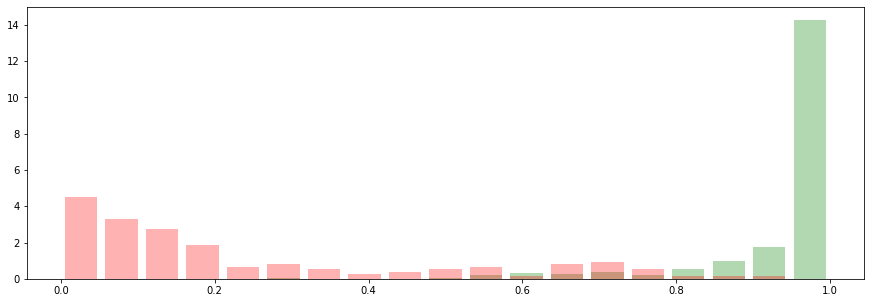

In [ ]:
pred_saudavel = rf.predict_proba(X_ts)[:, 0]
pred_suspeito = rf.predict_proba(X_ts)[:, 1]
pred_doente   = rf.predict_proba(X_ts)[:, 2]

bins = np.linspace(0, 1, 20)

plt.figure(figsize = (15,5))

#Avaliando para pessoas saudáveis como está a propensão deles.
plt.hist(pred_saudavel[y_ts==1], bins=bins, density=True, color='g', alpha=.3, rwidth=.8)
#Vendo qual a propensão de ser saudável para os demais (não saudáveis).
plt.hist(pred_saudavel[y_ts!=1], bins=bins, density=True, color='r', alpha=.3, rwidth=.8);

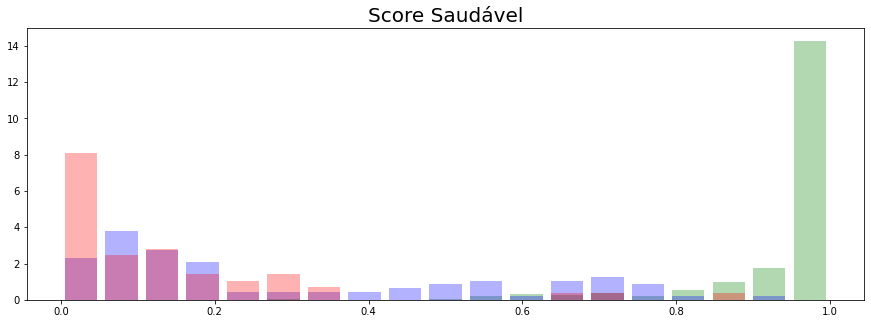

In [ ]:
pred_saudavel = rf.predict_proba(X_ts)[:, 0]
pred_suspeito = rf.predict_proba(X_ts)[:, 1]
pred_doente   = rf.predict_proba(X_ts)[:, 2]

bins = np.linspace(0, 1, 20)

plt.figure(figsize = (15,5))
#Avaliando a propensão de ser saudável dentro da classe saudável.
plt.hist(pred_saudavel[y_ts==1], bins=bins, density=True, color='g', alpha=.3, rwidth=.8)
#Analisando a propensão de ser suspeito dentro da classe saudável.
plt.hist(pred_saudavel[y_ts==2], bins=bins, density=True, color='b', alpha=.3, rwidth=.8)
#Analisando a propensão de ser doente dentro da classe saudável.
plt.hist(pred_saudavel[y_ts==3], bins=bins, density=True, color='r', alpha=.3, rwidth=.8)


plt.title('Score Saudável', fontsize=20);

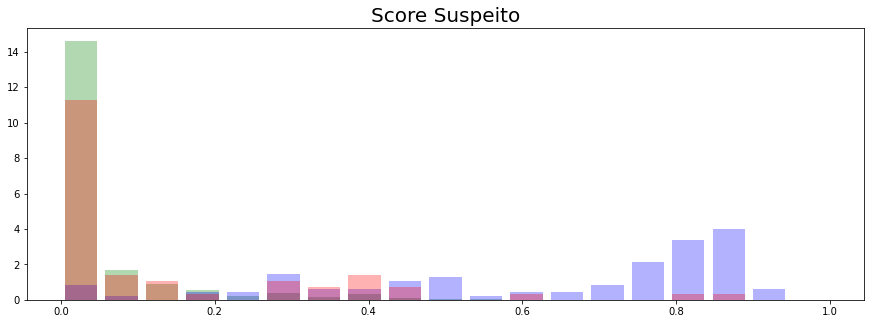

In [ ]:
pred_saudavel = rf.predict_proba(X_ts)[:, 0]
pred_suspeito = rf.predict_proba(X_ts)[:, 1]
pred_doente   = rf.predict_proba(X_ts)[:, 2]

bins = np.linspace(0, 1, 20)

plt.figure(figsize = (15,5))
#Avaliando a propensão de ser saudável dentro da classe suspeito.
plt.hist(pred_suspeito[y_ts==1], bins=bins, density=True, color='g', alpha=.3, rwidth=.8)
#Analisando a propensão de ser suspeito dentro da classe suspeito.
plt.hist(pred_suspeito[y_ts==2], bins=bins, density=True, color='b', alpha=.3, rwidth=.8)
#Analisando a propensão de ser doente dentro da classe suspeito.
plt.hist(pred_suspeito[y_ts==3], bins=bins, density=True, color='r', alpha=.3, rwidth=.8)


plt.title('Score Suspeito', fontsize=20);

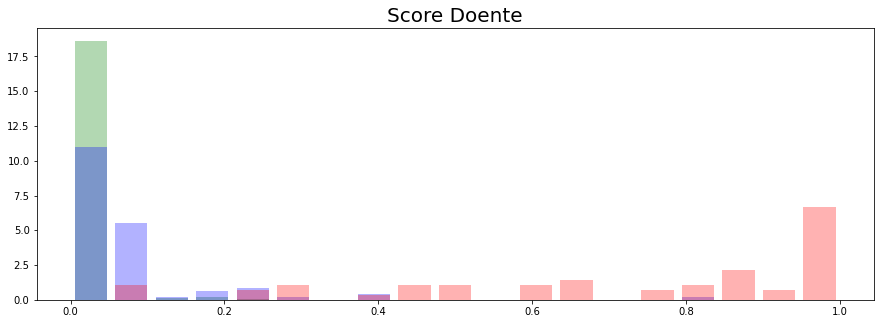

In [ ]:
pred_saudavel = rf.predict_proba(X_ts)[:, 0]
pred_suspeito = rf.predict_proba(X_ts)[:, 1]
pred_doente   = rf.predict_proba(X_ts)[:, 2]

bins = np.linspace(0, 1, 20)

plt.figure(figsize = (15,5))
#Avaliando a propensão de ser saudável dentro da classe doente.
plt.hist(pred_doente[y_ts==1], bins=bins, density=True, color='g', alpha=.3, rwidth=.8)
#Analisando a propensão de ser suspeito dentro da classe doente.
plt.hist(pred_doente[y_ts==2], bins=bins, density=True, color='b', alpha=.3, rwidth=.8)
#Analisando a propensão de ser doente dentro da classe doente.
plt.hist(pred_doente[y_ts==3], bins=bins, density=True, color='r', alpha=.3, rwidth=.8)


plt.title('Score Doente', fontsize=20);